In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### I will be using only first 3 or 4 variable to show the workflow of Univariate Statistical Analysis

In [69]:
df.shape

(768, 9)

In [70]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Datatypes are perfect , But we can change Outcome to boolean datatype which will save space.

In [71]:
df['Outcome'] = df['Outcome'].astype('bool')
df['Outcome'].dtypes

dtype('bool')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


### Pregnancies Variable

In [74]:
preg_proportion = np.array(df['Pregnancies'].value_counts())

In [75]:
preg_proportion

array([135, 111, 103,  75,  68,  57,  50,  45,  38,  28,  24,  11,  10,
         9,   2,   1,   1], dtype=int64)

In [76]:
preg_month = np.array(df['Pregnancies'].value_counts().index)
preg_month

array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 12, 14, 15, 17],
      dtype=int64)

In [77]:
preg_proportion_perc = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)
preg_proportion_perc

array([17, 14, 13,  9,  8,  7,  6,  5,  4,  3,  3,  1,  1,  1,  0,  0,  0])

In [78]:
preg = pd.DataFrame({'month':preg_month,'count_of_preg_prop':preg_proportion,'percentage_proportion':preg_proportion_perc})
preg.set_index(['month'],inplace=True)
preg.head(10)

,count_of_preg_prop,percentage_proportion
month,,
1,135,17
0,111,14
2,103,13
3,75,9
4,68,8
5,57,7
6,50,6
7,45,5
8,38,4


In [79]:
sum(preg_proportion)

768

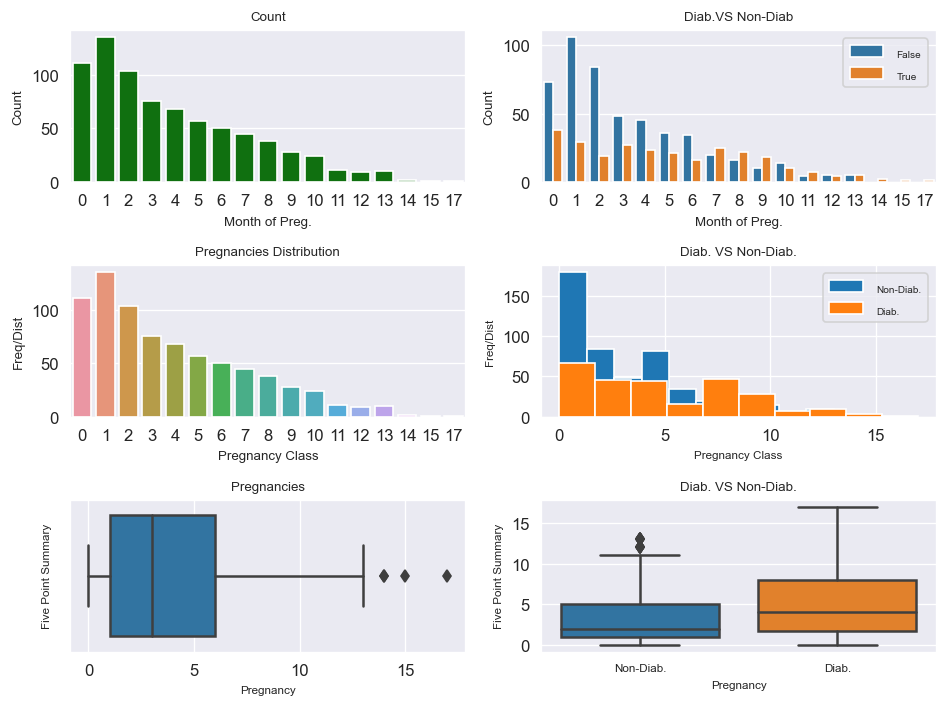

In [93]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(8,6))

plot00 = sns.countplot('Pregnancies', data=df, ax=axes[0][0], color='green')
axes[0][0].set_title('Count', fontdict={'fontsize':8})
axes[0][0].set_xlabel('Month of Preg.', fontdict={'fontsize':8})
axes[0][0].set_ylabel('Count', fontdict={'fontsize':8})
plt.tight_layout()

plot01 = sns.countplot('Pregnancies', data=df, ax=axes[0][1], hue='Outcome')
axes[0][1].set_title('Diab.VS Non-Diab', fontdict={'fontsize':8})
axes[0][1].set_xlabel('Month of Preg.', fontdict={'fontsize':8})
axes[0][1].set_ylabel('Count', fontdict={'fontsize':8})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10 = sns.countplot('Pregnancies', data=df, ax=axes[1][0])
axes[1][0].set_title('Pregnancies Distribution', fontdict={'fontsize':8})
axes[1][0].set_xlabel('Pregnancy Class', fontdict={'fontsize':8})
axes[1][0].set_ylabel('Freq/Dist', fontdict={'fontsize':8})
plt.tight_layout()

plot11 = df[df['Outcome']==False]['Pregnancies'].plot.hist(ax=axes[1][1],label='Non-Diab.')
plot11_2=df[df['Outcome']==True]['Pregnancies'].plot.hist(ax=axes[1][1],label='Diab.')
axes[1][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plot11.axes.legend(loc=1)
plt.setp(axes[1][1].get_legend().get_texts(), fontsize='6') # for legend text
plt.setp(axes[1][1].get_legend().get_title(), fontsize='6') # for legend title
plt.tight_layout()

plot20 = sns.boxplot(df['Pregnancies'],ax=axes[2][0],orient='v')
axes[2][0].set_title('Pregnancies',fontdict={'fontsize':8})
axes[2][0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=axes[2][1])
axes[2][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[2][1].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
plt.tight_layout()
plt.show()

#### Understanding Distribution

The distribution of Pregnancies in data is unimodal and skewed to the right, centered at about 1 with most of the data between 0 and 15. A range of roughly 15 and the outliers are present on the higher end.

## Glucose Variable

In [91]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

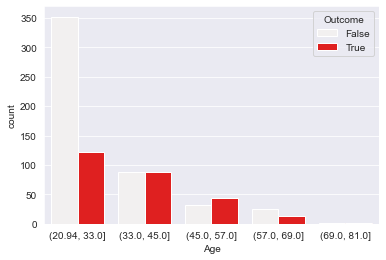

In [81]:
sns.countplot(pd.cut(df['Age'], bins=5), data=df, color='red', hue='Outcome' )

<AxesSubplot:ylabel='Frequency'>

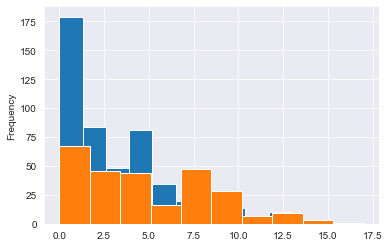

In [82]:
df[df['Outcome']==False]['Pregnancies'].plot.hist(label='Non-Diab')
df[df['Outcome']==True]['Pregnancies'].plot.hist(label='Diab')

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

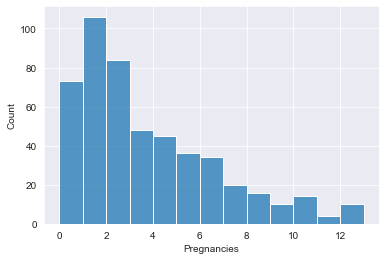

In [83]:
sns.histplot(df[df['Outcome']==False]['Pregnancies'], legend=False)

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

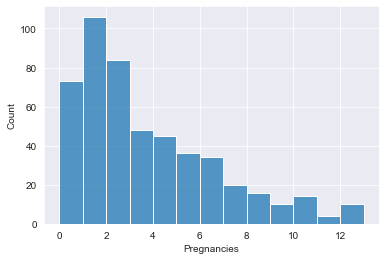

In [84]:
sns.histplot(df[df['Outcome']==False]['Pregnancies'], legend=True)

In [85]:
x = df[df['Outcome']==False]['Pregnancies']
y = df[df['Outcome']==True]['Pregnancies']

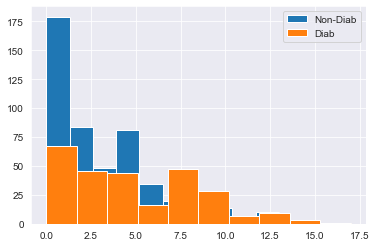

In [86]:
plt.hist(x, label='Non-Diab')
plt.hist(y, label='Diab')
plt.legend()
plt.show()